In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import math
%matplotlib inline

In [2]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')
match_ids = matches[matches.season >= 2016]['id'].unique()
matches1 = matches[(matches.season >= 2016) & (matches['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [3]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

In [5]:
team_1 = 'Mumbai Indians'
team_2 = 'Chennai Super Kings'

# Winning Probability of Teams

Text(0.5, 1.0, 'CSK Total Runs Score Stats Per Count')

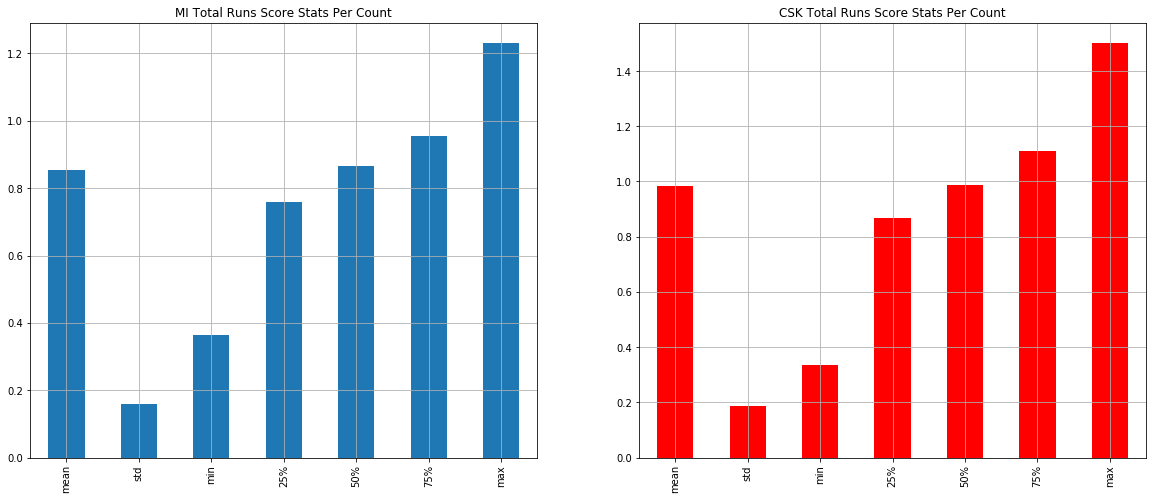

In [10]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
rr_runs = delivery[delivery['batting_team']==team_1].groupby('match_id').sum()['total_runs']
srh_runs = delivery[delivery['batting_team']==team_2].groupby('match_id').sum()['total_runs']
(rr_runs.describe()[1:]/rr_runs.describe()[0]).plot(ax=ax[0], kind='bar', grid=True)
(srh_runs.describe()[1:]/srh_runs.describe()[0]).plot(ax=ax[1], kind='bar', color='red', grid=True)
ax[0].set_title("MI Total Runs Score Stats Per Count")
ax[1].set_title("CSK Total Runs Score Stats Per Count")

Text(0.5, 1.0, 'Percentage of Winning')

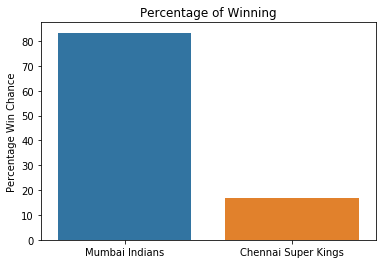

In [9]:
wins = pd.DataFrame(matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))]['winner'].value_counts())
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
sns.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

In [16]:
delivery = delivery[delivery.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

delivery.fillna(0, inplace=True)
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

delivery['batsman_runs'] = delivery['batsman_runs'].apply(lambda x: x-1 if ((x==7) or (x==5)) else x)

# De Kock runs

       Boundary Runs
count      37.000000
mean        6.864865
std         4.703203
min         0.000000
25%         4.000000
50%         8.000000
75%        10.000000
max        20.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000174C4D38948>]],
      dtype=object)

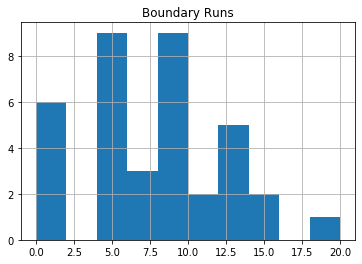

In [32]:
runs_kock = list()
match_id_kock = list()
for match_id in delivery[(delivery['batsman']== 'Q de Kock')]['match_id'].unique():
    runs = 0
    for run in delivery[(delivery['batsman']== 'Q de Kock') & (delivery['match_id']==match_id)]['batsman_runs'][:10]:
        if run in [4, 6]:
            runs += run
    runs_kock.append(runs)
    match_id_kock.append(match_id)
    
kock_runs = pd.DataFrame(index=match_id_kock, data=runs_kock, columns=['Boundary Runs'])
print(kock_runs.describe())
kock_runs.hist()

# MI bowlers best dot ball to total ball ratio

Text(0.5, 1.0, 'Dot balls to total balls bowled ratio')

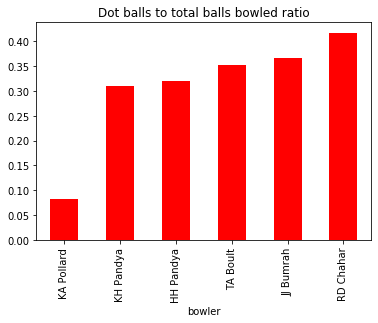

In [134]:
mi_bowlers = ['JJ Bumrah', 'RD Chahar', 'TA Boult', 'KH Pandya', 'HH Pandya', 'KA Pollard']
bowlers_dot = delivery[(delivery['bowler'].isin(mi_bowlers)) & (delivery['total_runs']==0)]
bowlers_match = delivery[(delivery['bowler'].isin(mi_bowlers)) & (delivery['match_id'].isin(bowlers_dot['match_id']))]
(bowlers_dot.groupby('bowler').count()['total_runs']/bowlers_match.groupby('bowler').count()['ball']).sort_values().plot(kind='bar', color='red')
plt.title("Dot balls to total balls bowled ratio")

The top 3 bowlers have almost equal ratios, so we have to consider the recent matches as well. 
Since, the match is in Sharjah Stadium, and JJ Bumrah is in form in the recent matches, the prediction is JJ Bumrah.

# Number of Overs having 6 and 4 both

count    53.000000
mean      3.075472
std       1.685333
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: index, dtype: float64


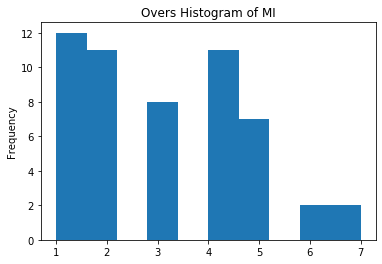

In [91]:
mi_four_six = delivery[(delivery['batting_team']==team_1) & (delivery['batsman_runs'].isin([4, 6]))]
match_id_mi = list()
over_mi = list()
for match_id in mi_four_six['match_id'].unique():
    for over in mi_four_six[(mi_four_six['match_id']==match_id)]['over'].unique():
        if len(mi_four_six[(mi_four_six['match_id']==match_id) & (mi_four_six['over']==over)]['batsman_runs'].value_counts())==2:
            match_id_mi.append(match_id)
            over_mi.append(over)

mi_over_hit = pd.DataFrame(index=match_id_mi, data=over_mi, columns=['Over']).reset_index()
mi_over_hit['index'].value_counts().plot(kind='hist')
plt.title("Overs Histogram of MI")
print(mi_over_hit['index'].value_counts().describe())

count    30.000000
mean      2.866667
std       1.224276
min       1.000000
25%       2.000000
50%       2.000000
75%       4.000000
max       5.000000
Name: index, dtype: float64


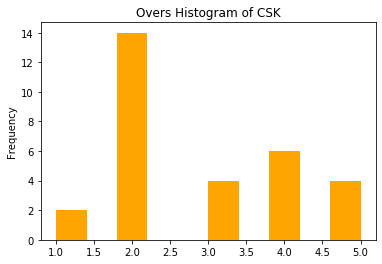

In [135]:
csk_four_six = delivery[(delivery['batting_team']==team_2) & (delivery['batsman_runs'].isin([4, 6]))]
match_id_csk = list()
over_csk = list()
for match_id in csk_four_six['match_id'].unique():
    for over in csk_four_six[(csk_four_six['match_id']==match_id)]['over'].unique():
        if len(csk_four_six[(csk_four_six['match_id']==match_id) & (csk_four_six['over']==over)]['batsman_runs'].value_counts())==2:
            match_id_csk.append(match_id)
            over_csk.append(over)

csk_over_hit = pd.DataFrame(index=match_id_csk, data=over_csk, columns=['Over']).reset_index()
csk_over_hit['index'].value_counts().plot(kind='hist', color='orange')
plt.title("Overs Histogram of CSK")
print(csk_over_hit['index'].value_counts().describe())

Taking mean and median values the overs range is 5-6

# BLS

In [100]:
csk_bowlers = ['PP Chawla', 'SN Thakur', 'DL Chahar', 'RA Jadeja', 'SR Watson', 'S Curran']

In [132]:
bowlers_bls = list()
bowlers = list()
for bowler in (mi_bowlers+csk_bowlers):
    for match_id in delivery[(delivery['bowler']==bowler)]['match_id'].unique():
        match = delivery[(delivery['bowler']== bowler) & (delivery['match_id']==match_id)]
        wickets = len(match[match['player_dismissed']==1])
        boundaries = len(match[match['batsman_runs'].isin([4,6])])  
        dot_balls = len(match[(match['total_runs']==0)])
        runs = sum(match[match['batsman_runs'].isin([4,6])]['batsman_runs'])
        balls = len(match)
        if (balls >= 6) & (boundaries>0):
            bls = ((wickets + dot_balls) - (runs/boundaries))/balls
            bowlers.append(bowler)
            bowlers_bls.append(bls)
         
        
bls = pd.DataFrame(index=bowlers, data=bowlers_bls, columns=['BLS']).reset_index()
bls['Team'] = bls['index'].apply(lambda x: 'CSK' if x in csk_bowlers else 'MI')

Text(0.5, 1.0, 'BLS of MI Bowlers')

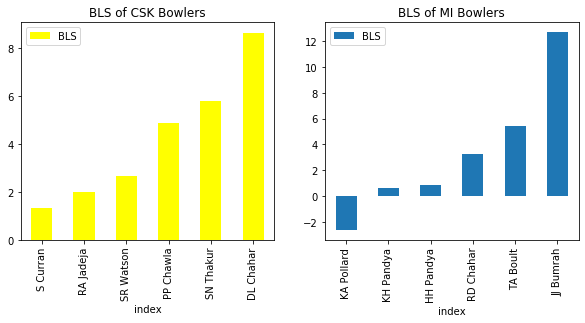

In [133]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
bls[bls['Team']=='CSK'].groupby('index').sum().sort_values(by='BLS').plot(ax=ax[0], kind='bar', color='yellow')
bls[bls['Team']=='MI'].groupby('index').sum().sort_values(by='BLS').plot(ax=ax[1], kind='bar')
ax[0].set_title("BLS of CSK Bowlers")
ax[1].set_title("BLS of MI Bowlers")

# Summary

- Winning probability of the teams was decided using winner column and central tendency measures were compared for total score per match. 
- After filtering data for de Kock, the number of runs scored through boundaries in first 10 balls was calculated for every match and histogram was plotted.
- Data were filtered for bowlers playing today in MI, then the number of dot balls per match and total balls for each bowler was calculated and divided to get dot balls to total balls ratio. 
- The overs having at least one 4 and 6 in it was filtered using constraints for MI and CSK individually, and then such overs were counted per match and histogram plot was plotted. Using, histogram and mean values the range for total overs was estimated. 
- For BLS, the wickets taken, dot balls bowled, total runs by boundaries, total boundaries, total balls bowled per bowler per match was calculated and put into BLS formula. 
